## Student Exam Performance

In [1]:
# import all packages and set plots to be embedded inline
import pandas as pd 
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# load the data
df=pd.read_csv('../input/students-performance-in-exams/StudentsPerformance.csv')

In [3]:
# display the first 5 rows
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
#looking the shape of the data
df.shape

(1000, 8)

In [5]:
# Display dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
# Check for number of null values on each columns
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
#Check for duplicate records
df.duplicated().sum()

0

In [8]:
# Display dataset summary statistics
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
# rename & update columns names
df.rename(columns={'race/ethnicity':'ethnicity','parental level of education':'parent_education'},inplace=True);
df.rename(columns=lambda x:x.strip().replace(' ','_'),inplace=True)

In [10]:
# check columns names
df.columns

Index(['gender', 'ethnicity', 'parent_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [11]:
# Display gender Value Counts
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [12]:
# Display ethnicity Value Counts
df['ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: ethnicity, dtype: int64

In [13]:
# Display parental_level_of_education Value Counts
df['parent_education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parent_education, dtype: int64

In [14]:
# Display lunch Value Counts
df['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [15]:
# Display test_preparation_course Value Counts
df['test_preparation_course'].value_counts()

none         642
completed    358
Name: test_preparation_course, dtype: int64

## Exploration

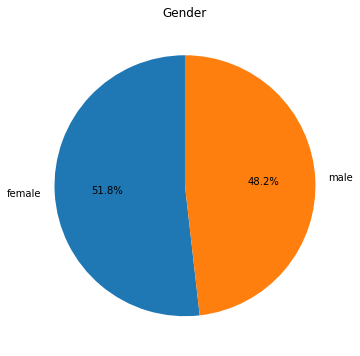

In [16]:
# Ploting the distribution of gender
labels=df['gender'].value_counts().index
values=df['gender'].value_counts().values

plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Gender')
plt.show()

- we find that percent of female in our data is 51.8% more than percent of male 48.2%.

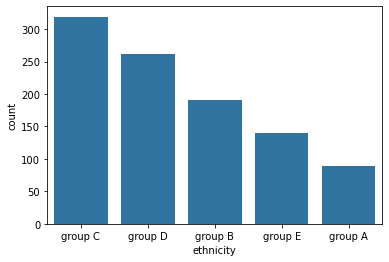

In [17]:
# Ploting the distribution of ethnicity
base_color=sb.color_palette()[0]
freq=df['ethnicity'].value_counts()
gen_order=freq.index
sb.countplot(data=df,x='ethnicity',color=base_color,order=gen_order);

- The most common ethnicity was group C then comes group D, in the third place we have group B followed by group E and group A . 

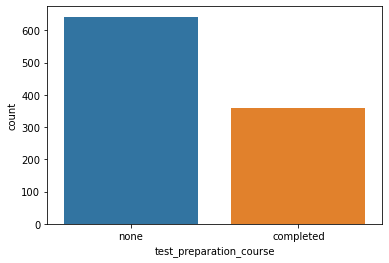

In [18]:
# Ploting the distribution of test_preparation_course
sb.countplot(data=df,x='test_preparation_course');

- we can see that most of student didn't take the test preparation course.

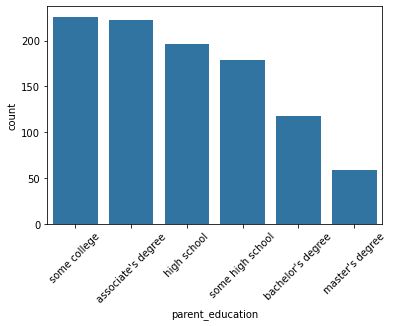

In [19]:
# Ploting the distribution of parental_level_of_education
base_color=sb.color_palette()[0]
freq=df['parent_education'].value_counts()
gen_order=freq.index
sb.countplot(data=df,x='parent_education',color=base_color,order=gen_order)
plt.xticks(rotation=45);

- We find that the most common education of parents is some collage and associate's degree. The Master's degree is the fewest.

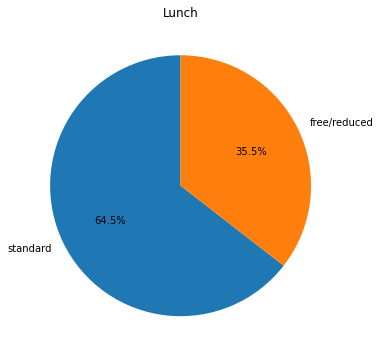

In [20]:
# Ploting the distribution of lunch
labels=df['lunch'].value_counts().index
values=df['lunch'].value_counts().values

plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Lunch')
plt.show()


- we find that the standard lunch is common with 64.5% more than free/reduced lunch with 35.5%.

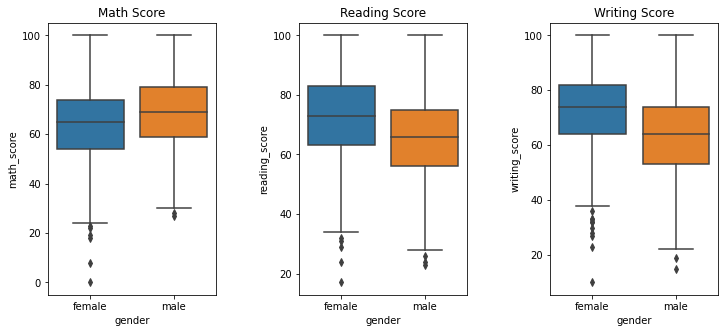

In [21]:
# plotting the relation between gender and each score
fig, ax = plt.subplots(figsize=(12,5), ncols=3)
fig.subplots_adjust(wspace=1/2)
ax[0].set_title('Math Score')
sb.boxplot(ax=ax[0],x=df['gender'],y=df['math_score'])


ax[1].set_title('Reading Score')
sb.boxplot(ax=ax[1],x=df['gender'],y=df['reading_score'])


ax[2].set_title('Writing Score')
sb.boxplot(ax=ax[2],x=df['gender'],y=df['writing_score']);

- On average, female students performed better on the tests than the male students, except for on the math test.
- there are outliers of females more than males.

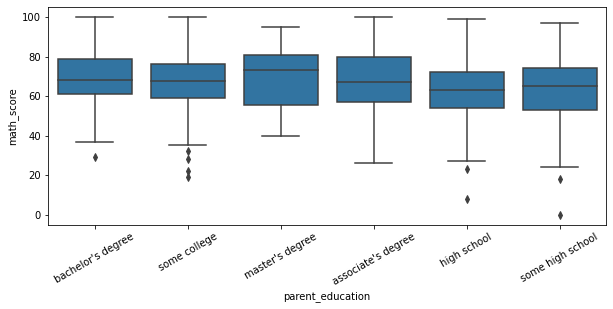

In [22]:
# plotting the relation between parent_education and math_score
plt.figure(figsize=(10,4))
sb.boxplot(x=df['parent_education'],y=df['math_score'],color= sb.color_palette()[0])
plt.xticks(rotation=30);


- On average, students performed better on math test if the parent's education is master's degree.
- there are outliers of some college education and other educations level excpet master's degree and associate's degree. 

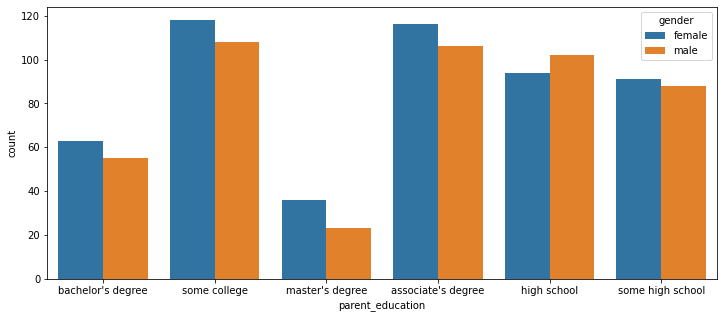

In [23]:
# plotting the relation between parent_education and gender
plt.figure(figsize=(12,5))
sb.countplot(x=df['parent_education'],hue=df['gender']);


we find that parents education level of females are more than males ,except high school eduction level males are more.

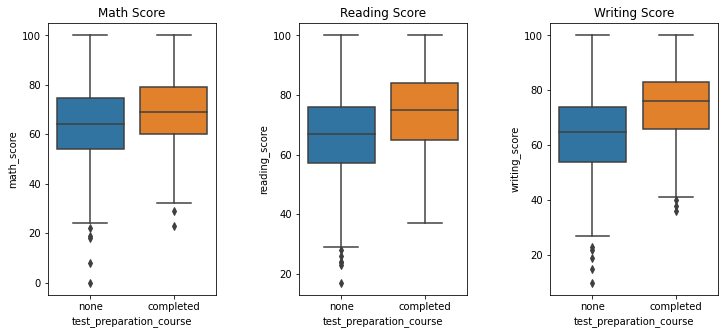

In [24]:
# plotting the relation between test_preparation_course and each score
fig, ax = plt.subplots(figsize=(12,5), ncols=3)
fig.subplots_adjust(wspace=1/2)
ax[0].set_title('Math Score')
sb.boxplot(ax=ax[0],x=df['test_preparation_course'],y=df['math_score'])


ax[1].set_title('Reading Score')
sb.boxplot(ax=ax[1],x=df['test_preparation_course'],y=df['reading_score'])


ax[2].set_title('Writing Score')
sb.boxplot(ax=ax[2],x=df['test_preparation_course'],y=df['writing_score']);

- On average, students performed better on the tests when take the test preparation course .
- there are outliers of none more than completed the test preparation course.

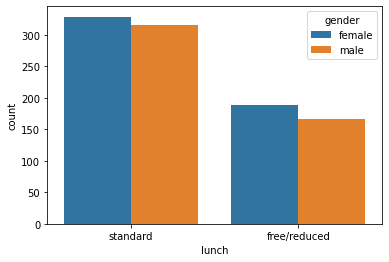

In [25]:
# plotting the relation between lunch and gender
sb.countplot(x=df['lunch'],hue=df['gender']);

we find that females and males perefer standard lunch more than free/reduced lunch.

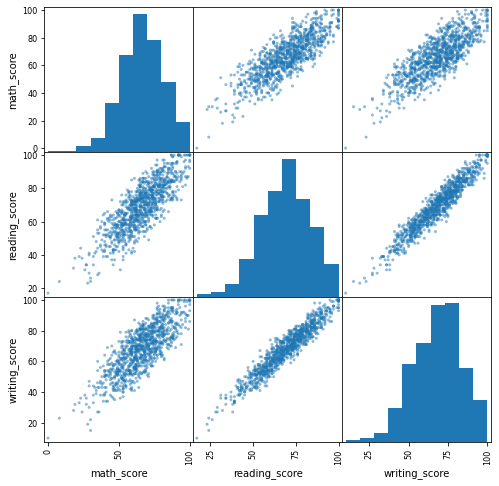

In [26]:
# plotting the relation between math_score,reading_score and writing_score
pd.plotting.scatter_matrix(df,figsize=(8,8));

- There are a positive relationship between scores in the three tests.

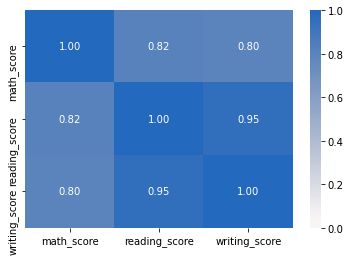

In [27]:
# Ploting heatmap for math_score,reading_score and writing_score
sb.heatmap(df.corr(),annot=True,fmt='.2f',cmap='vlag_r',center=0,vmin=0);

- The correlation coefficient between scores in the three tests is a positive correlation, which means the higher in one test  is expected to have higher in the other tests.

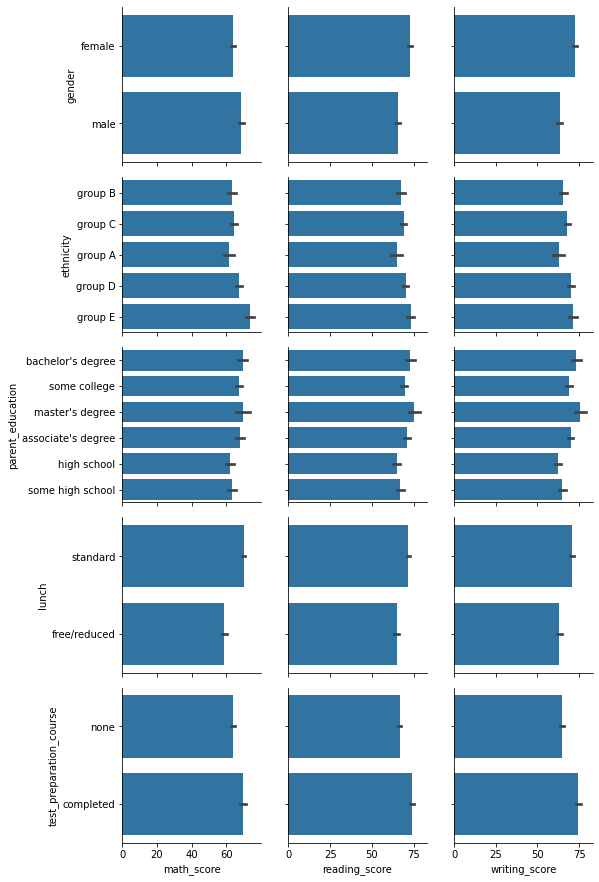

In [28]:
# Plotting Pair grid plot for all dataset
g=sb.PairGrid(data=df,x_vars=['math_score','reading_score','writing_score']
              ,y_vars=['gender','ethnicity','parent_education','lunch','test_preparation_course'])
g.map(sb.barplot,color= sb.color_palette()[0]);

- Based on this figures, we show that the parent education and test preparation course have effect on the score of tests.

### Conclusions

 I found that :
- There are a relationships between  parent education, test preparation course and scores in tests.Which means that parent education and test preparation course effect on scores in tests.
- There is a positive correlation between scores in the three tests, which means the higher in one test is expected to have higher in the other tests.
- On average, female students performed better on the tests than the male students, except for on the math test.
- Females and Males perefer standard lunch more than free/reduced lunch.